# Preprocessamento delle immagini in formato .geojson (metodo 2)

Faccio un preprocessamento utilizzando un secondo metodo per verificare se ottengo sempre le stesse maschere.

In [ ]:
from preprocessing import create_masks

image_folder = '../data/train/AOI_11_Rotterdam/PS-RGB'
geojson_folder = '../data/train/AOI_11_Rotterdam/geojson_buildings'
create_masks(image_folder, geojson_folder)
print("Masks created successfully!")

Masks created successfully!


# Verifica dei due metodi
Stampo le prime 5 immagini da entrambe le cartelle in cui ho messo i file delle maschere, così da fare un check se combaciano.

Visualizzazione delle prime 5 immagini da ogni cartella:
1. Maschere originali (PNG): ../data/train/AOI_11_Rotterdam/masks
2. Maschere rasterizzate (PNG/TIF): ../data/train/AOI_11_Rotterdam/rasterized_masks

Caricamento immagini da: ../data/train/AOI_11_Rotterdam/masks


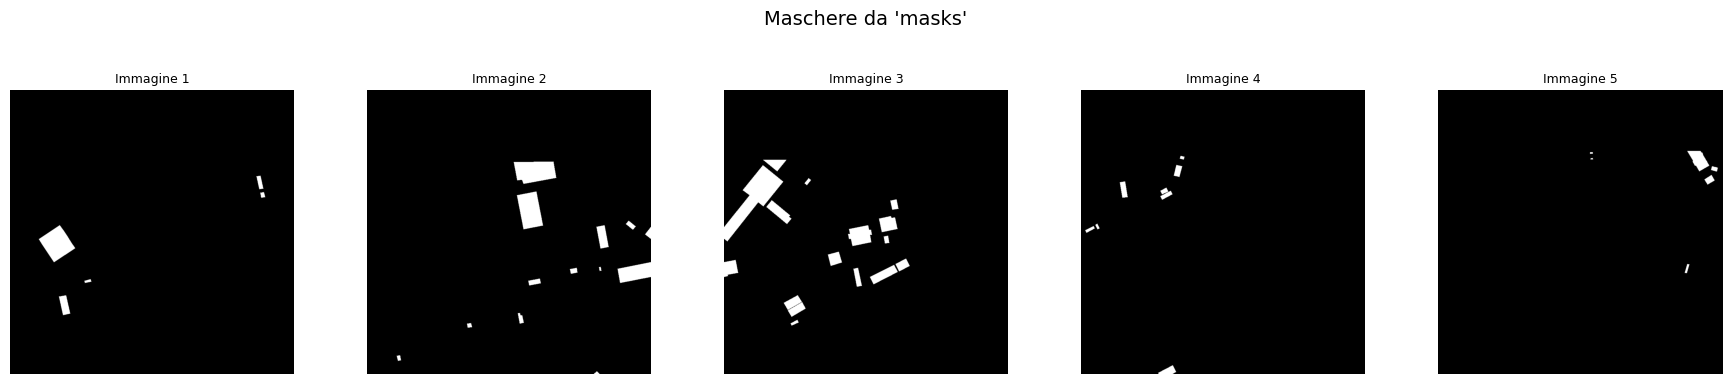

Caricamento immagini da: ../data/train/AOI_11_Rotterdam/rasterized_masks


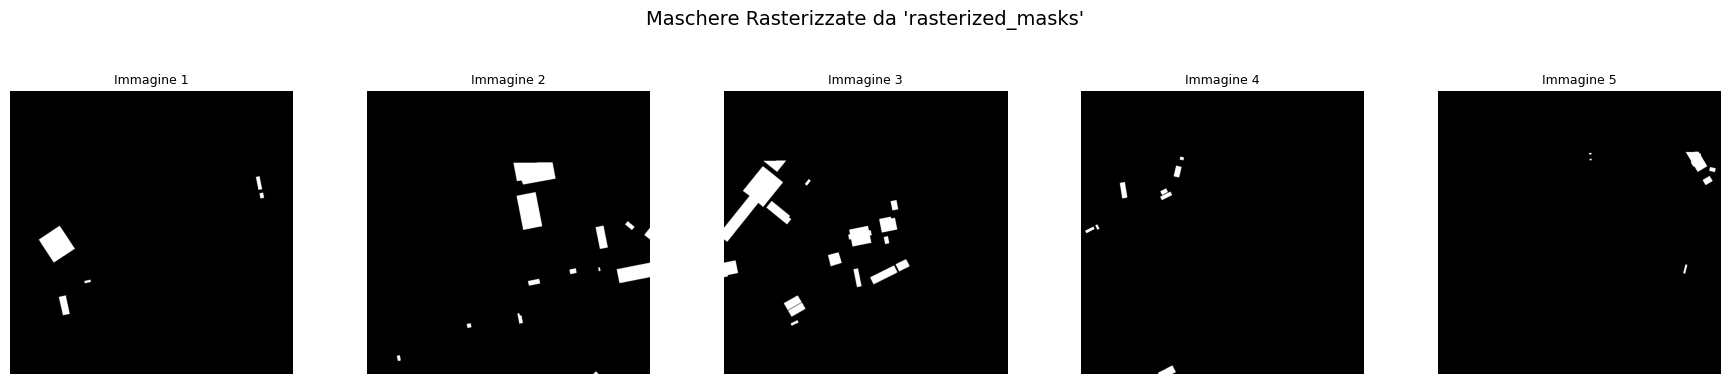

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Percorsi delle cartelle
MASKS_FOLDER = '../data/train/AOI_11_Rotterdam/masks'
RASTERIZED_MASKS_FOLDER = '../data/train/AOI_11_Rotterdam/rasterized_masks'

NUM_IMAGES_TO_DISPLAY = 5

print(f"Visualizzazione delle prime {NUM_IMAGES_TO_DISPLAY} immagini da ogni cartella:")
print(f"1. Maschere originali (PNG): {MASKS_FOLDER}")
print(f"2. Maschere rasterizzate (PNG/TIF): {RASTERIZED_MASKS_FOLDER}\n")

# Funzione per caricare e visualizzare un'immagine da una cartella
def display_images_from_folder(folder_path, title_prefix, file_extensions=('.png', '.tif')):
    print(f"Caricamento immagini da: {folder_path}")
    try:

        image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(file_extensions)])

        if not image_files:
            print(f"Nessun file immagine trovato in {folder_path}.")
            return

        # Crea una figura con una riga e NUM_IMAGES_TO_DISPLAY colonne
        fig, axes = plt.subplots(1, NUM_IMAGES_TO_DISPLAY, figsize=(18, 4))
        fig.suptitle(f"{title_prefix}", fontsize=14)

        if NUM_IMAGES_TO_DISPLAY == 1:
            axes = [axes] 

        for i in range(min(NUM_IMAGES_TO_DISPLAY, len(image_files))):
            img_filename = image_files[i]
            img_path = os.path.join(folder_path, img_filename)

            try:
                img = Image.open(img_path).convert('L')
                
                axes[i].imshow(img, cmap='gray')
                # Per pulizia, invece di stampare il nome del file metto un nome generico
                axes[i].set_title(f"Immagine {i+1}", fontsize=9)
                axes[i].axis('off') 
            except Exception as e:
                axes[i].text(0.5, 0.5, f"Errore: {e}", horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes, color='red', fontsize=7)
                axes[i].axis('off')
                print(f"  Errore caricamento '{img_filename}': {e}")

        plt.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()

    except FileNotFoundError:
        print(f"Errore: Cartella non trovata: {folder_path}. Controlla il percorso.")
        print(f"  La Current Working Directory è: {os.getcwd()}")
    except Exception as e:
        print(f"Si è verificato un errore inaspettato durante l'elaborazione di {folder_path}: {e}")

# Test della funzione
display_images_from_folder(MASKS_FOLDER, "Maschere da 'masks'", file_extensions=('.png',))
display_images_from_folder(RASTERIZED_MASKS_FOLDER, "Maschere Rasterizzate da 'rasterized_masks'", file_extensions=('.png', '.tif'))

Le maschere combaciano in tutti e 5 i casi, i metodi scritti sembrano funzionare entrambi.